In [87]:
library(ISLR)
library(leaps)
library(dplyr)

# Best Subset Selection

In [8]:
# The data to work with
Hitters = na.omit(Hitters)
head(Hitters)

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
-Alan Ashby,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
-Alvin Davis,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
-Andre Dawson,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
-Andres Galarraga,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
-Alfredo Griffin,594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,750.0,A
-Al Newman,185,37,1,23,8,21,2,214,42,1,30,9,24,N,E,76,127,7,70.0,A


In [11]:
best_subset = leaps::regsubsets(Salary ~., Hitters)

The regsubsets() function identifies the best model using RSS.

In [14]:
summary(best_subset)

Subset selection object
Call: regsubsets.formula(Salary ~ ., Hitters)
19 Variables  (and intercept)
           Forced in Forced out
AtBat          FALSE      FALSE
Hits           FALSE      FALSE
HmRun          FALSE      FALSE
Runs           FALSE      FALSE
RBI            FALSE      FALSE
Walks          FALSE      FALSE
Years          FALSE      FALSE
CAtBat         FALSE      FALSE
CHits          FALSE      FALSE
CHmRun         FALSE      FALSE
CRuns          FALSE      FALSE
CRBI           FALSE      FALSE
CWalks         FALSE      FALSE
LeagueN        FALSE      FALSE
DivisionW      FALSE      FALSE
PutOuts        FALSE      FALSE
Assists        FALSE      FALSE
Errors         FALSE      FALSE
NewLeagueN     FALSE      FALSE
1 subsets of each size up to 8
Selection Algorithm: exhaustive
         AtBat Hits HmRun Runs RBI Walks Years CAtBat CHits CHmRun CRuns CRBI
1  ( 1 ) " "   " "  " "   " "  " " " "   " "   " "    " "   " "    " "   "*" 
2  ( 1 ) " "   "*"  " "   " "  " " " "   

The asterick indicates predictors that are included for every model size up to 8 (default). For example, the best model with 2 predictors is one with **CRBI** and **Hits**. It's possible to increase the number of models considered with the ***nvmax*** parameter:

In [21]:
best_subset2 = regsubsets(Salary ~., data = Hitters,
                          nvmax = 19)

best_subset2_summary = summary(best_subset2)

In [22]:
best_subset2_summary

Subset selection object
Call: regsubsets.formula(Salary ~ ., data = Hitters, nvmax = 19)
19 Variables  (and intercept)
           Forced in Forced out
AtBat          FALSE      FALSE
Hits           FALSE      FALSE
HmRun          FALSE      FALSE
Runs           FALSE      FALSE
RBI            FALSE      FALSE
Walks          FALSE      FALSE
Years          FALSE      FALSE
CAtBat         FALSE      FALSE
CHits          FALSE      FALSE
CHmRun         FALSE      FALSE
CRuns          FALSE      FALSE
CRBI           FALSE      FALSE
CWalks         FALSE      FALSE
LeagueN        FALSE      FALSE
DivisionW      FALSE      FALSE
PutOuts        FALSE      FALSE
Assists        FALSE      FALSE
Errors         FALSE      FALSE
NewLeagueN     FALSE      FALSE
1 subsets of each size up to 19
Selection Algorithm: exhaustive
          AtBat Hits HmRun Runs RBI Walks Years CAtBat CHits CHmRun CRuns CRBI
1  ( 1 )  " "   " "  " "   " "  " " " "   " "   " "    " "   " "    " "   "*" 
2  ( 1 )  " "   "*"

The summary function for regsubsets also returns metrics for model evaluation and selection. For example:

In [24]:
# Adjusted r squared
best_subset2_summary$adjr2

[1] 0.3188503 0.4208024 0.4450753 0.4672734 0.4808971 0.4972001 0.5007849
 [8] 0.5137083 0.5180572 0.5222606 0.5225706 0.5217245 0.5206736 0.5195431
[15] 0.5178661 0.5162219 0.5144464 0.5126097 0.5106270

In [25]:
# Mallow's cp - lower the better
best_subset2_summary$cp

[1] 104.281319  50.723090  38.693127  27.856220  21.613011  14.023870
 [7]  13.128474   7.400719   6.158685   5.009317   5.874113   7.330766
[13]   8.888112  10.481576  12.346193  14.187546  16.087831  18.011425
[19]  20.000000

In [26]:
best_subset2_summary$bic

[1]  -90.84637 -128.92622 -135.62693 -141.80892 -144.07143 -147.91690
 [7] -145.25594 -147.61525 -145.44316 -143.21651 -138.86077 -133.87283
[13] -128.77759 -123.64420 -118.21832 -112.81768 -107.35339 -101.86391
[19]  -96.30412

Plot many metrics at once:

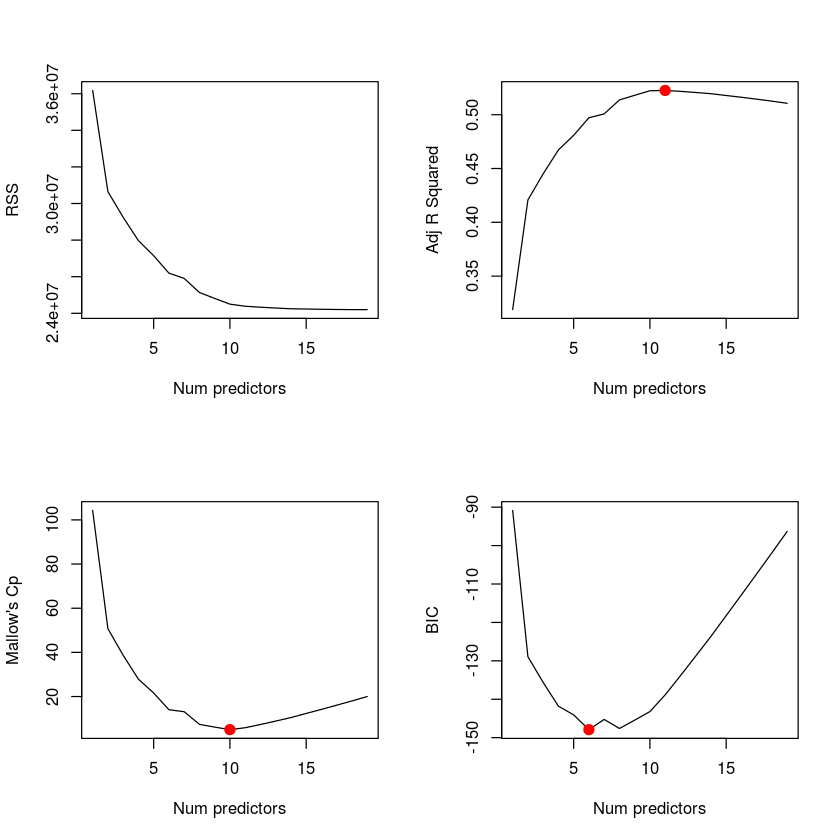

In [52]:
par(mfrow = c(2,2))

# RSS plot
plot(best_subset2_summary$rss, xlab = "Num predictors",
     ylab = "RSS", type = "l")

# Adjusted R Squared plot
plot(best_subset2_summary$adjr2, xlab = "Num predictors",
     ylab = "Adj R Squared", type = "l")

index_adjr_max = which.max(best_subset2_summary$adjr2)
# Points supplies a x and y coordinate to put a point
# on a graph already created
points(index_adjr_max, 
       best_subset2_summary$adjr2[index_adjr_max],
       col = "red",
       cex = 2, pch = 20)

# Mallow's CP plot
plot(best_subset2_summary$cp, xlab = "Num predictors",
     ylab = "Mallow's Cp", type = "l")

# Point on mallow's cp with minimum
index_cp_min = which.min(best_subset2_summary$cp)
points(index_cp_min, 
       best_subset2_summary$cp[index_cp_min],
       col = "red",
       cex = 2, pch = 20)

# BIC plot
plot(best_subset2_summary$bic, xlab = "Num predictors",
     ylab = "BIC", type = "l")

# Point on BIC with minimum
index_bic_min = which.min(best_subset2_summary$bic)
points(index_bic_min, 
       best_subset2_summary$bic[index_bic_min],
       col = "red",
       cex = 2, pch = 20)

In built plot functions for regsubsets() can be useful for selecting variabes for the best model according to BIC, Cp, adjusted R Squared or AIC. The top row represents the optimal model, and the black represents features that are included in that model:

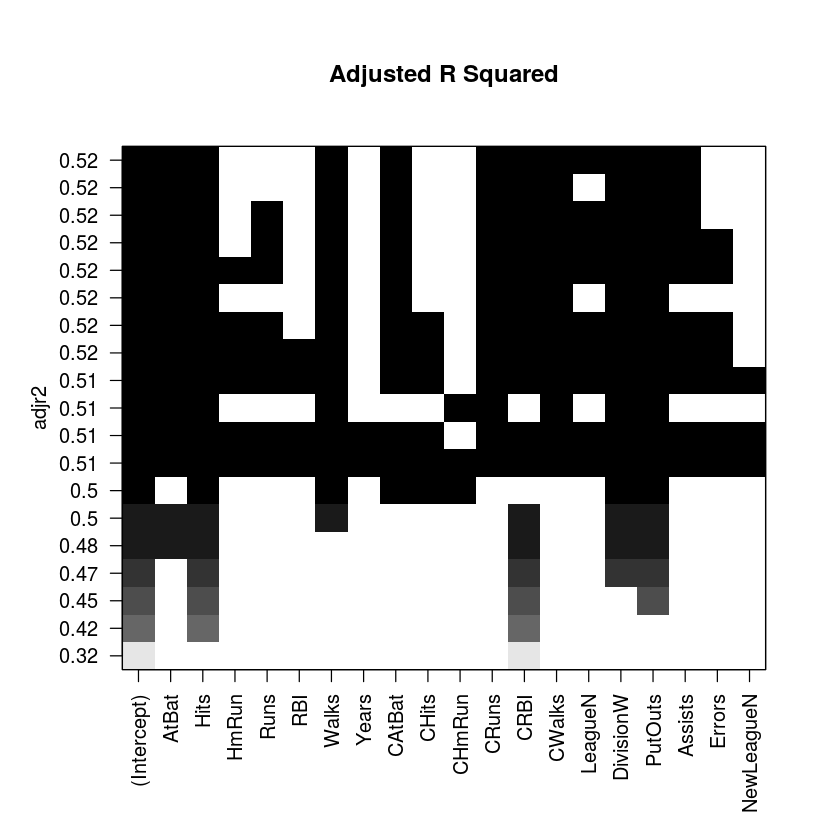

In [73]:
plot(best_subset2, scale = "adjr2", 
     main = "Adjusted R Squared")

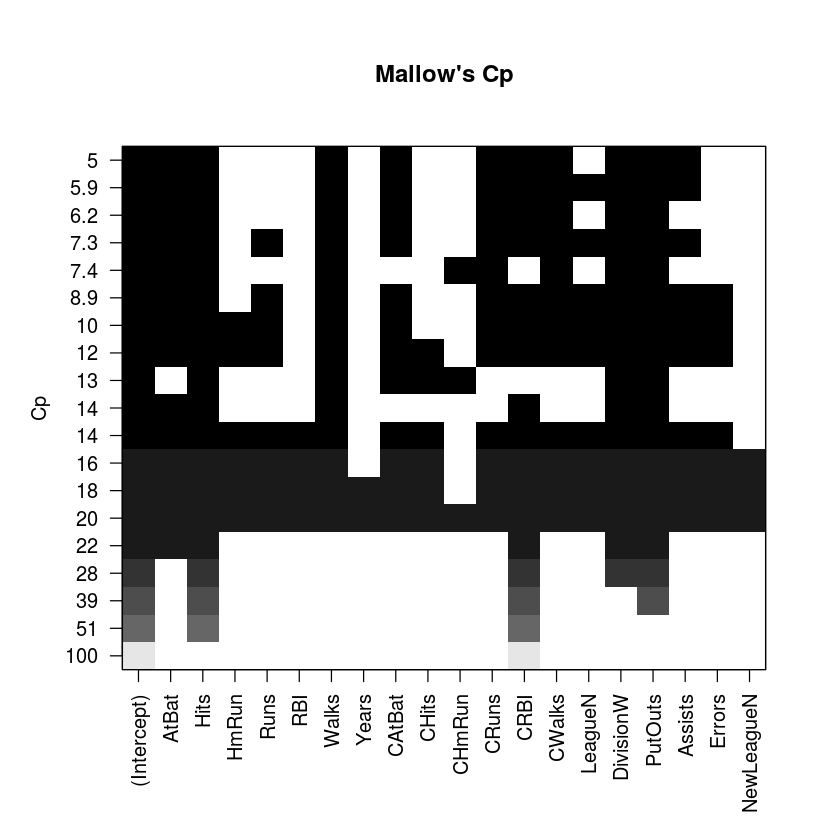

In [74]:
plot(best_subset2, scale = "Cp",
     main = "Mallow's Cp")

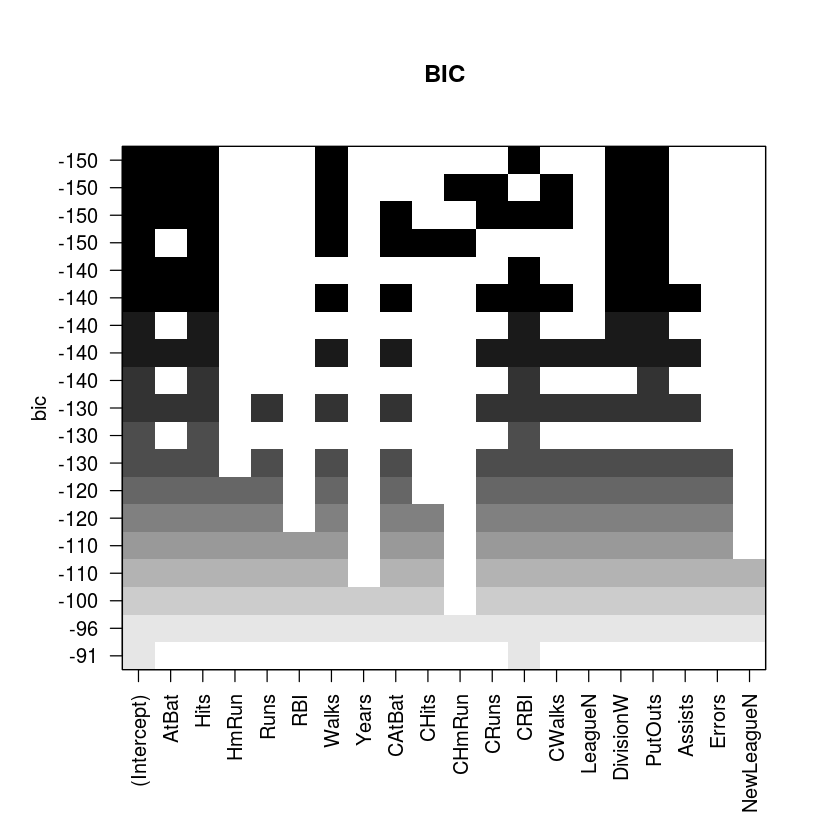

In [75]:
plot(best_subset2, scale = "bic",
     main = "BIC")

According to the BIC, we should select a 6 feature model. We can get the coefficients as follows:

In [77]:
coef(best_subset2, 6)

(Intercept)        AtBat         Hits        Walks         CRBI    DivisionW 
  91.5117981   -1.8685892    7.6043976    3.6976468    0.6430169 -122.9515338 
     PutOuts 
   0.2643076

# Forward/Backward stepwise selection

In [78]:
# Forward selection - specified with a method argument.
regfit_fwd = regsubsets(Salary ~ .,
                        data = Hitters,
                        nvmax = 19,
                        method = "forward")

regfit_bwd = regsubsets(Salary ~ .,
                        data = Hitters,
                        nvmax = 19,
                        method = "backward")

In [80]:
summary(regfit_fwd)

Subset selection object
Call: regsubsets.formula(Salary ~ ., data = Hitters, nvmax = 19, method = "forward")
19 Variables  (and intercept)
           Forced in Forced out
AtBat          FALSE      FALSE
Hits           FALSE      FALSE
HmRun          FALSE      FALSE
Runs           FALSE      FALSE
RBI            FALSE      FALSE
Walks          FALSE      FALSE
Years          FALSE      FALSE
CAtBat         FALSE      FALSE
CHits          FALSE      FALSE
CHmRun         FALSE      FALSE
CRuns          FALSE      FALSE
CRBI           FALSE      FALSE
CWalks         FALSE      FALSE
LeagueN        FALSE      FALSE
DivisionW      FALSE      FALSE
PutOuts        FALSE      FALSE
Assists        FALSE      FALSE
Errors         FALSE      FALSE
NewLeagueN     FALSE      FALSE
1 subsets of each size up to 19
Selection Algorithm: forward
          AtBat Hits HmRun Runs RBI Walks Years CAtBat CHits CHmRun CRuns CRBI
1  ( 1 )  " "   " "  " "   " "  " " " "   " "   " "    " "   " "    " "   "*" 
2 

In [81]:
summary(regfit_bwd)

Subset selection object
Call: regsubsets.formula(Salary ~ ., data = Hitters, nvmax = 19, method = "backward")
19 Variables  (and intercept)
           Forced in Forced out
AtBat          FALSE      FALSE
Hits           FALSE      FALSE
HmRun          FALSE      FALSE
Runs           FALSE      FALSE
RBI            FALSE      FALSE
Walks          FALSE      FALSE
Years          FALSE      FALSE
CAtBat         FALSE      FALSE
CHits          FALSE      FALSE
CHmRun         FALSE      FALSE
CRuns          FALSE      FALSE
CRBI           FALSE      FALSE
CWalks         FALSE      FALSE
LeagueN        FALSE      FALSE
DivisionW      FALSE      FALSE
PutOuts        FALSE      FALSE
Assists        FALSE      FALSE
Errors         FALSE      FALSE
NewLeagueN     FALSE      FALSE
1 subsets of each size up to 19
Selection Algorithm: backward
          AtBat Hits HmRun Runs RBI Walks Years CAtBat CHits CHmRun CRuns CRBI
1  ( 1 )  " "   " "  " "   " "  " " " "   " "   " "    " "   " "    "*"   " " 


Let's see how coefficient selection for **forward**, **backward** and **best subset** selection differ:

In [91]:
coef(regfit_bwd, 7)

(Intercept)        AtBat         Hits        Walks        CRuns       CWalks 
 105.6487488   -1.9762838    6.7574914    6.0558691    1.1293095   -0.7163346 
   DivisionW      PutOuts 
-116.1692169    0.3028847

In [92]:
coef(regfit_fwd, 7)

(Intercept)        AtBat         Hits        Walks         CRBI       CWalks 
 109.7873062   -1.9588851    7.4498772    4.9131401    0.8537622   -0.3053070 
   DivisionW      PutOuts 
-127.1223928    0.2533404

In [93]:
coef(best_subset2, 7) 

(Intercept)         Hits        Walks       CAtBat        CHits       CHmRun 
  79.4509472    1.2833513    3.2274264   -0.3752350    1.4957073    1.4420538 
   DivisionW      PutOuts 
-129.9866432    0.2366813

We can see that the coefficeints selected by forward/backward/best subset selection all differ.

We can also choose among models using Cp, BIC and adjusted R Squared through the validation set and cross validation approach.

# Ridge regression

In [117]:
library(glmnet)

In [121]:
# model.matrix automatically transforms qualitative to dummys
x = model.matrix(Salary ~., Hitters)[,-1]
y = Hitters$Salary
grid=10^seq(10,-2, length =100)

The alpha parameter in ridge regression determines whether a ridge or lasso is fit. If **alpha** = 1, a lasso model is fit. If **alpha** = 0, a ridge model is fit. Note that glmnet() standardizes the data by default.

In [122]:
# grid supplies custom list of lambdas
ridge = glmnet(x, y, alpha = 0, lambda = grid)

In [131]:
coef(ridge)

   [[ suppressing 100 column names ‘s0’, ‘s1’, ‘s2’ ... ]]


20 x 100 sparse Matrix of class "dgCMatrix"
                                                                   
(Intercept)  5.359257e+02  5.359256e+02  5.359256e+02  5.359254e+02
AtBat        5.443467e-08  7.195940e-08  9.512609e-08  1.257511e-07
Hits         1.974589e-07  2.610289e-07  3.450649e-07  4.561554e-07
HmRun        7.956523e-07  1.051805e-06  1.390424e-06  1.838059e-06
Runs         3.339178e-07  4.414196e-07  5.835307e-07  7.713931e-07
RBI          3.527222e-07  4.662778e-07  6.163918e-07  8.148335e-07
Walks        4.151323e-07  5.487803e-07  7.254552e-07  9.590089e-07
Years        1.697711e-06  2.244274e-06  2.966798e-06  3.921931e-06
CAtBat       4.673743e-09  6.178412e-09  8.167496e-09  1.079695e-08
CHits        1.720071e-08  2.273832e-08  3.005872e-08  3.973585e-08
CHmRun       1.297171e-07  1.714783e-07  2.266842e-07  2.996631e-07
CRuns        3.450846e-08  4.561814e-08  6.030449e-08  7.971898e-08
CRBI         3.561348e-08  4.707892e-08  6.223556e-08  8.227173e-08
CWal

In [133]:
dim(coef(ridge))

[1]  20 100

In [134]:
dim(Hitters)

[1] 263  20

Asking for the coefficients returns p number of rows, and number of columns equal to number of lambda values used.

A useful thing to do is to use **cross validation** to choose the lambda parameter.

In [135]:
set.seed(1)

cv_out = cv.glmnet(x[train,], y[train], alpha = 0)

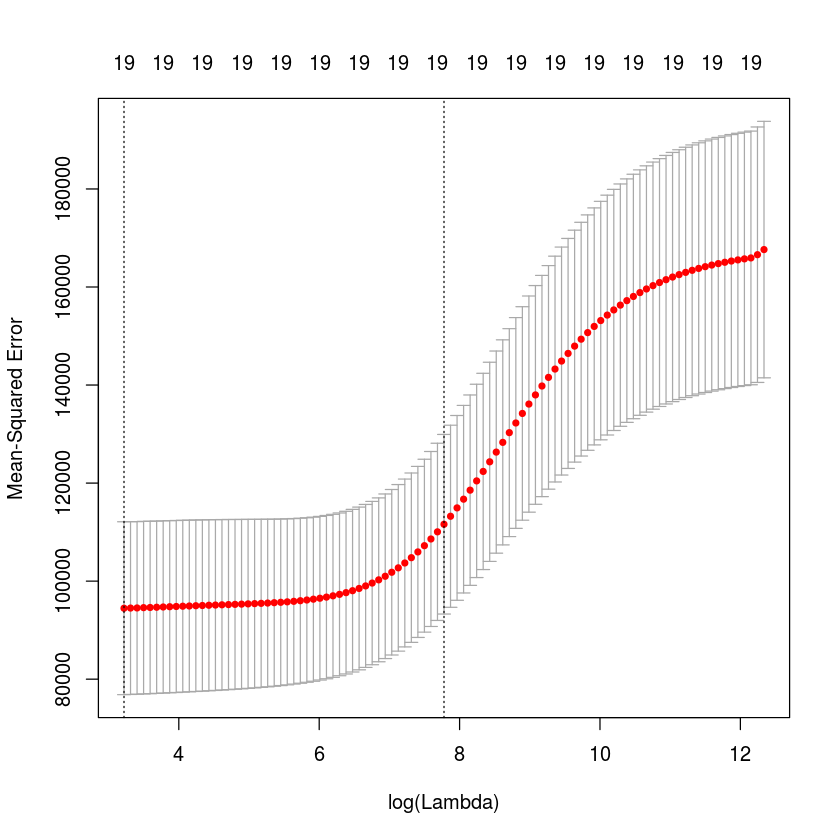

In [136]:
plot(cv_out)

In [172]:
# Best CV'd lambda
bestlam = cv_out$lambda.min

# Predictions with best lamda
ridge_pred = predict(ridge, s = bestlam,
                     newx = x[test,])

# MSE of ridge with CV'd lambda
MSE = mean((ridge_pred - y[test])**2)

sprintf("The best lambda according to CV is: %s", bestlam)
sprintf("The best MSE with the ridge model is: %s", MSE)

[1] "The best lambda according to CV is: 10.5770500709057"

[1] "The best MSE with the ridge model is: 114050.477488017"

The final step is to refit the ridge model on the full dataset using the lambda value chosen via CV:

In [159]:
out = glmnet(x, y, alpha = 0, lambda = bestlam)
predict(out, type = "coefficients")

20 x 1 sparse Matrix of class "dgCMatrix"
                       s0
(Intercept)  8.126618e+01
AtBat       -6.924484e-01
Hits         2.802593e+00
HmRun       -1.331973e+00
Runs         1.018811e+00
RBI          7.094697e-01
Walks        3.393413e+00
Years       -9.016449e+00
CAtBat      -8.224971e-04
CHits        1.348927e-01
CHmRun       6.824021e-01
CRuns        2.923806e-01
CRBI         2.626716e-01
CWalks      -2.790591e-01
LeagueN      5.333963e+01
DivisionW   -1.229419e+02
PutOuts      2.640445e-01
Assists      1.705951e-01
Errors      -3.695139e+00
NewLeagueN  -1.830125e+01

As expected, ridge doesn't perform variable selection.

# The Lasso

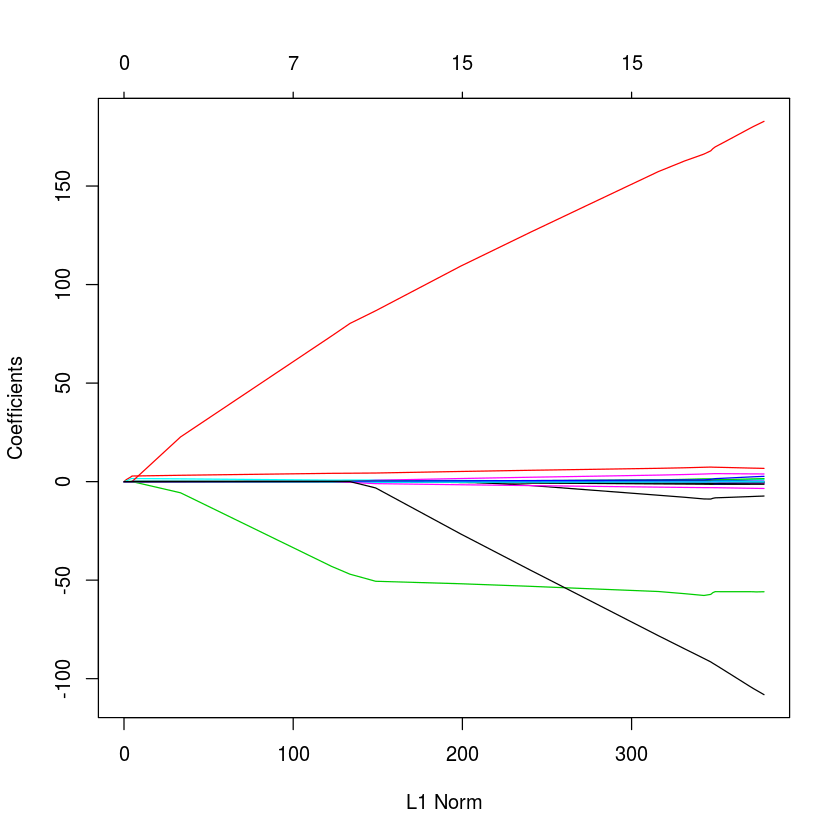

In [160]:
# Setting alpha to 1 gives a lasso model
lasso_mod = glmnet(x[train,], y[train],
                   alpha = 1, lambda = grid)

plot(lasso_mod)

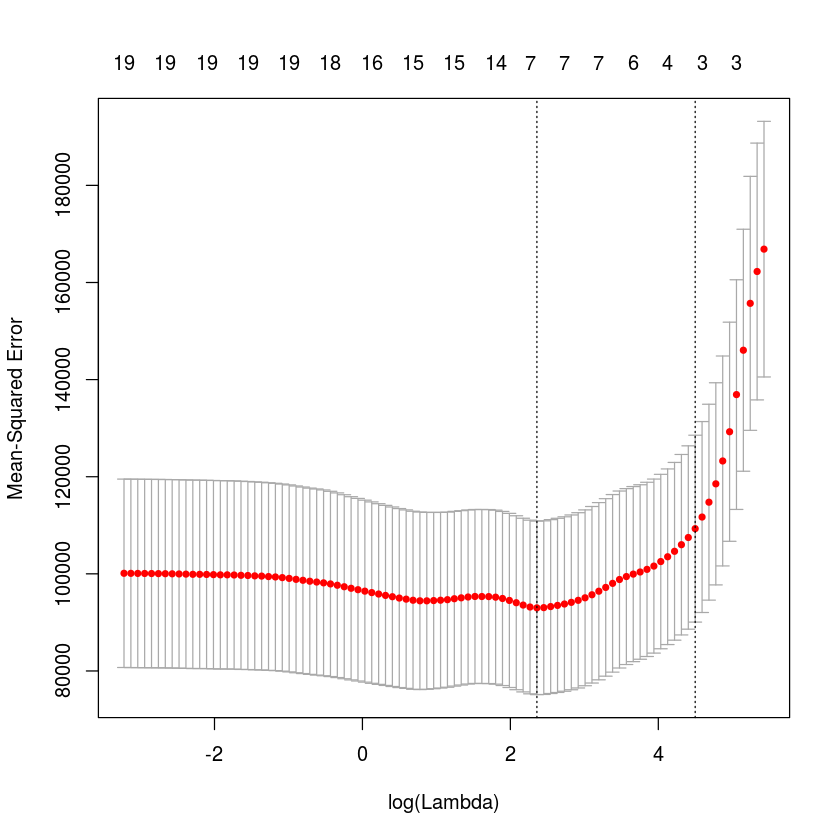

In [161]:
set.seed(1)

cv_out = cv.glmnet(x[train,], y[train], alpha = 1)
plot(cv_out)

In [174]:
# Best cross validated lambda
bestlam = cv_out$lambda.min

# lasso predictions on test data
lasso_pred = predict(lasso_mod, s = bestlam,
                     newx = x[test,])

# MSE of lasso on test data
MSE_lasso = mean((lasso_pred - y[test])**2)

sprintf("The best CV lambda for lasso is: %s", bestlam)
sprintf("The MSE of lasso on CV lambda is: %s", MSE_lasso)

[1] "The best CV lambda for lasso is: 10.5770500709057"

[1] "The MSE of lasso on CV lambda is: 161022.56703636"

In [178]:
out = glmnet(x, y, alpha = 1, lambda = grid)

lasso_coef = predict(out, type = "coefficients",
                     s = bestlam)

In [179]:
lasso_coef

20 x 1 sparse Matrix of class "dgCMatrix"
                        1
(Intercept)  8.898370e-01
AtBat       -5.575622e-03
Hits         2.007078e+00
HmRun        .           
Runs         .           
RBI          .           
Walks        2.268641e+00
Years       -3.428874e-02
CAtBat       .           
CHits        .           
CHmRun       8.315024e-03
CRuns        2.102106e-01
CRBI         4.211554e-01
CWalks       .           
LeagueN      1.695962e+01
DivisionW   -1.143553e+02
PutOuts      2.343374e-01
Assists      .           
Errors      -6.607899e-01
NewLeagueN   .           

# Principal component regression

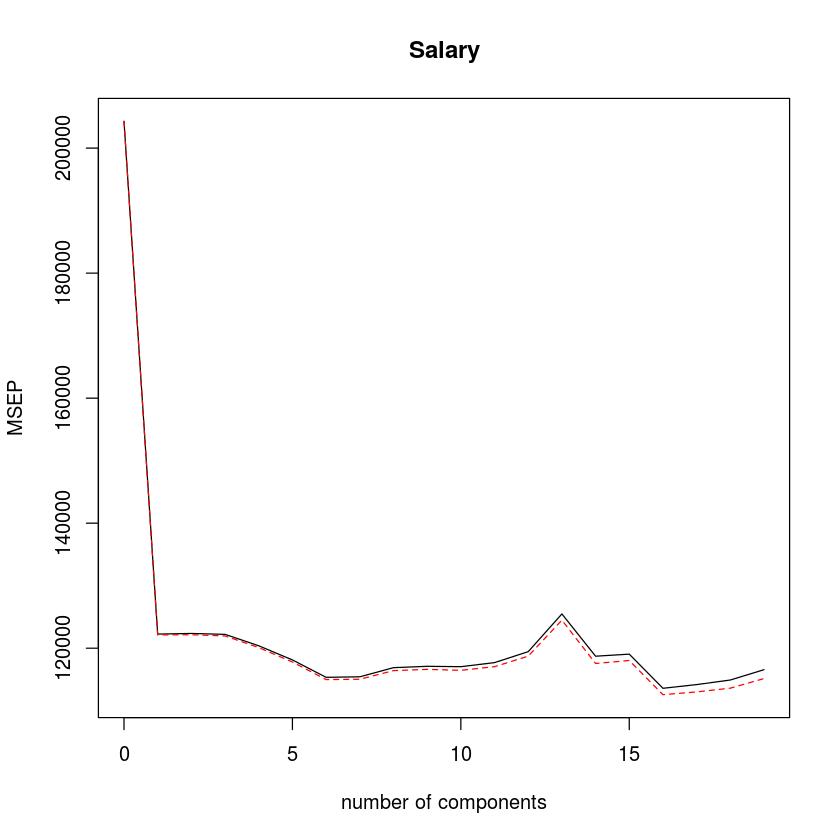

In [185]:
library(pls)

# Principal component regression - cross validated
# Cross validation performed for each component number
pcr_fit = pcr(Salary ~., data = Hitters, 
              scale = T, validation = "CV")

# validationplot plots CV'd MSE against number of components
validationplot(pcr_fit, val.type = "MSEP")

# Partial least squares

In [189]:
set.seed(1)

# plsr fits partial least squares
pls_fit = plsr(Salary ~., data = Hitters,
               subset = train, scale = T,
               validation = "CV")

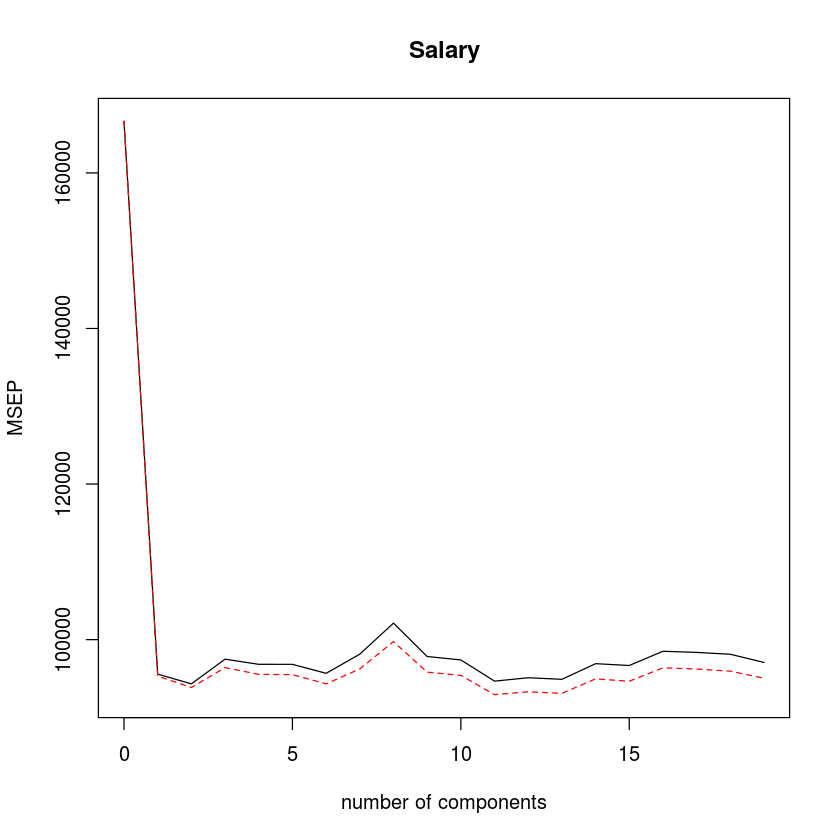

In [193]:
validationplot(pls_fit, val.type = "MSEP")

The plot suggests that M = 2 partial least squares directions are best.

In [195]:
pls_pred = predict(pls_fit, x[test,], ncomp = 2)
MSE_holdout = mean((pls_pred - y[test])**2)

sprintf("The MSE of the holdout set using comp = 2 is: %s", 
        MSE_holdout)

[1] "The MSE of the holdout set using comp = 2 is: 155849.331211184"

Finally, we fit the model with M = 2 components on the full dataset.

In [198]:
pls_fit = plsr(Salary ~., data = Hitters, 
               scale = T, ncomp = 2)

In [199]:
summary(pls_fit)

Data: 	X dimension: 263 19 
	Y dimension: 263 1
Fit method: kernelpls
Number of components considered: 2
TRAINING: % variance explained
        1 comps  2 comps
X         38.08    51.03
Salary    43.05    46.40


Notice that the percentage of variance in Salary that the two-component
PLS fit explains, 46.40 %, is almost as much as that explained using the
6.8 Exercises 259
final seven-component model PCR fit, 46.69 %. This is because PCR only
attempts to maximize the amount of variance explained in the predictors,
while PLS searches for directions that explain variance in both the predictors
and the response.